In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid


from efficient_fpt.models import MultiStageModel
# from efficient_fpt.single_stage import 
from efficient_fpt.multi_stage import get_multistage_densities

### Example 1: multi-stage model

#### 1.1 Simulate and visualize the model

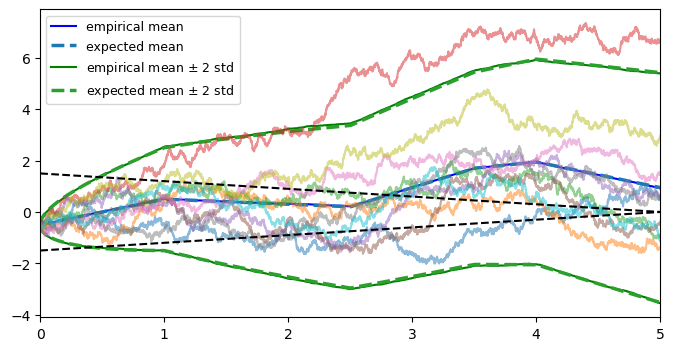

In [ ]:
## Parameter set 1
# mu_array = np.array([1.0, -0.2, 1.5, -2.0, 2.0])
# sacc_array = np.array([0, 1.5, 3.0, 4.0, 4.5])
# sigma_array = np.array([1.0, 0.8, 0.75, 0.8, 1.0])
# x0 = -0.5
# num = 2000

# a1 = 2.0
# b1_array = np.array([-0.1, -0.25, -0.5, -0.1, -0.3])
# a2 = -1.5
# b2_array = np.array([0.3, 0.15, 0.4, 0, 0.5])
# T = 6.1875

## Parameter set 2
mu_array = np.array([1.0, -0.2, 1.5, 0.5, -1.0])
sacc_array = np.array([0, 1.0, 2.5, 3.5, 4.0])
sigma_array = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
x0 = -0.5
num = 2000

a1 = 1.5
b1_array = np.array([-0.3, -0.3, -0.3, -0.3, -0.3])
a2 = -1.5
b2_array = np.array([0.3, 0.3, 0.3, 0.3, 0.3])
T = 5

ddm = MultiStageModel(mu_array=mu_array, sacc_array=sacc_array, sigma_array=sigma_array, a1=a1, b1_array=b1_array, a2=a2, b2_array=b2_array, x0=x0)
t_grid, X_grids = ddm.simulate_trajs(T=T, Nt=1000 * T, num=num)

expected_mean = cumulative_trapezoid(ddm.drift_coeff(_, t_grid), t_grid, initial=0) + x0
empirical_mean = np.mean(X_grids, axis=0)
expected_std = np.sqrt(cumulative_trapezoid(ddm.diffusion_coeff(_, t_grid) ** 2, t_grid, initial=0))
empirical_std = np.std(X_grids, axis=0)


fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(t_grid, empirical_mean, label="empirical mean", c="b")
ax.plot(t_grid, expected_mean, label="expected mean", linewidth=2.5, linestyle="--", c="tab:blue")
ax.plot(t_grid, empirical_mean + 2 * empirical_std, label=r"empirical mean $\pm$ 2 std", c="g")
ax.plot(t_grid, empirical_mean - 2 * empirical_std, c="g")
ax.plot(t_grid, expected_mean + 2 * expected_std, label=r"expected mean $\pm$ 2 std", linewidth=2.5, linestyle="--", c="tab:green")
ax.plot(t_grid, expected_mean - 2 * expected_std, linewidth=2.5, linestyle="--", c="tab:green")
ax.plot(t_grid, X_grids[:10, :].T, alpha=0.5)
ax.plot(t_grid, ddm.upper_bdy(t_grid), c='k', linestyle="--")
ax.plot(t_grid, ddm.lower_bdy(t_grid), c='k', linestyle="--")
ax.autoscale(axis="x", tight=True)
ax.legend(fontsize=9)
plt.show()

#### 1.2 Simulate first passage times, compute FPTDs and NPDs

##### 1.2.1 For a small $T$, plot both FPTDs and NPD

In [3]:
T = 2
num_fpt = 100000



fp_times, np_poss = ddm.simulate_fptd_tillT(T=T, dt=0.001, num=num_fpt)
counts_t, bins_t = np.histogram(fp_times, bins=100)
dt_bin = bins_t[1] - bins_t[0]
counts_x, bins_x = np.histogram(np_poss, bins=20)
dx_bin = bins_x[1] - bins_x[0]



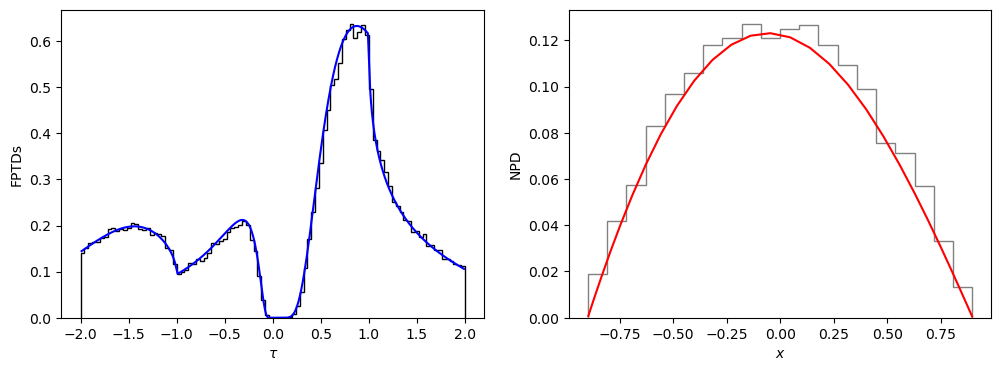

In [4]:
eps = 0.01
ts = np.arange(eps, T, 1e-4)
fptds, npds = get_multistage_densities(ts, mu_array, sacc_array, sigma_array, a1, b1_array, a2, b2_array, T, x0=np.array([[1], [x0]]), eps=eps)

ts, upper_fptds, lower_fptds = fptds[0, :], fptds[1, :], fptds[2, :]
xs, npd = npds[0, :], npds[1, :]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].stairs(counts_t / num_fpt / dt_bin, bins_t, color="black")
ax[0].plot(ts, upper_fptds, c='b')
ax[0].plot(-ts, lower_fptds, c='b')
ax[0].set_xlabel(r"$\tau$")
ax[0].set_ylabel("FPTDs")

ax[1].stairs(counts_x / num_fpt / dx_bin, bins_x, color="gray")
ax[1].plot(xs, npd, c='r')
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel("NPD")

plt.show()

##### 1.2.2 For a large $T$, plot the whole FPTDs

In [5]:
T = 5 # 6.1875
num_fpt = 100000



fp_times, np_poss = ddm.simulate_fptd_tillT(T=T, dt=1e-4, num=num_fpt)
counts_t, bins_t = np.histogram(fp_times, bins=100)
dt_bin = bins_t[1] - bins_t[0]

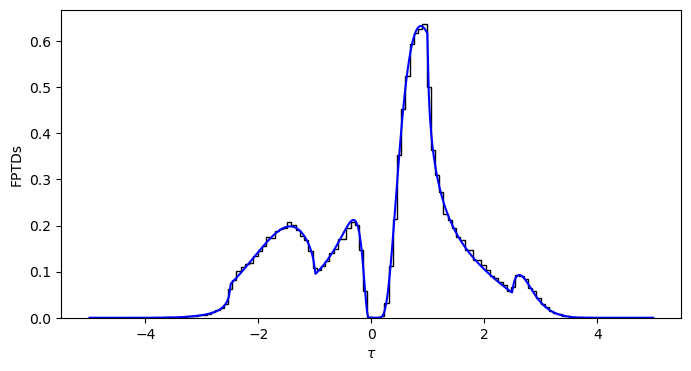

In [6]:
eps = 0.01
ts = np.arange(eps, T, 1e-4)
fptds, npds = get_multistage_densities(ts, mu_array, sacc_array, sigma_array, a1, b1_array, a2, b2_array, T, x0=np.array([[1], [x0]]), eps=eps)

ts, upper_fptds, lower_fptds = fptds[0, :], fptds[1, :], fptds[2, :]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.stairs(counts_t / num_fpt / dt_bin, bins_t, color="black")
ax.plot(ts, upper_fptds, c='b')
ax.plot(-ts, lower_fptds, c='b')
ax.set_xlabel(r"$\tau$")
ax.set_ylabel("FPTDs")

plt.show()

make plot for the paper

In [7]:
import matplotlib as mpl

import os
if '/oscar/home/sliu167/texlive/2024/bin/x86_64-linux' not in os.environ['PATH']:
    os.environ['PATH'] = '/oscar/home/sliu167/texlive/2024/bin/x86_64-linux:' + os.environ['PATH']

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amsfonts}'

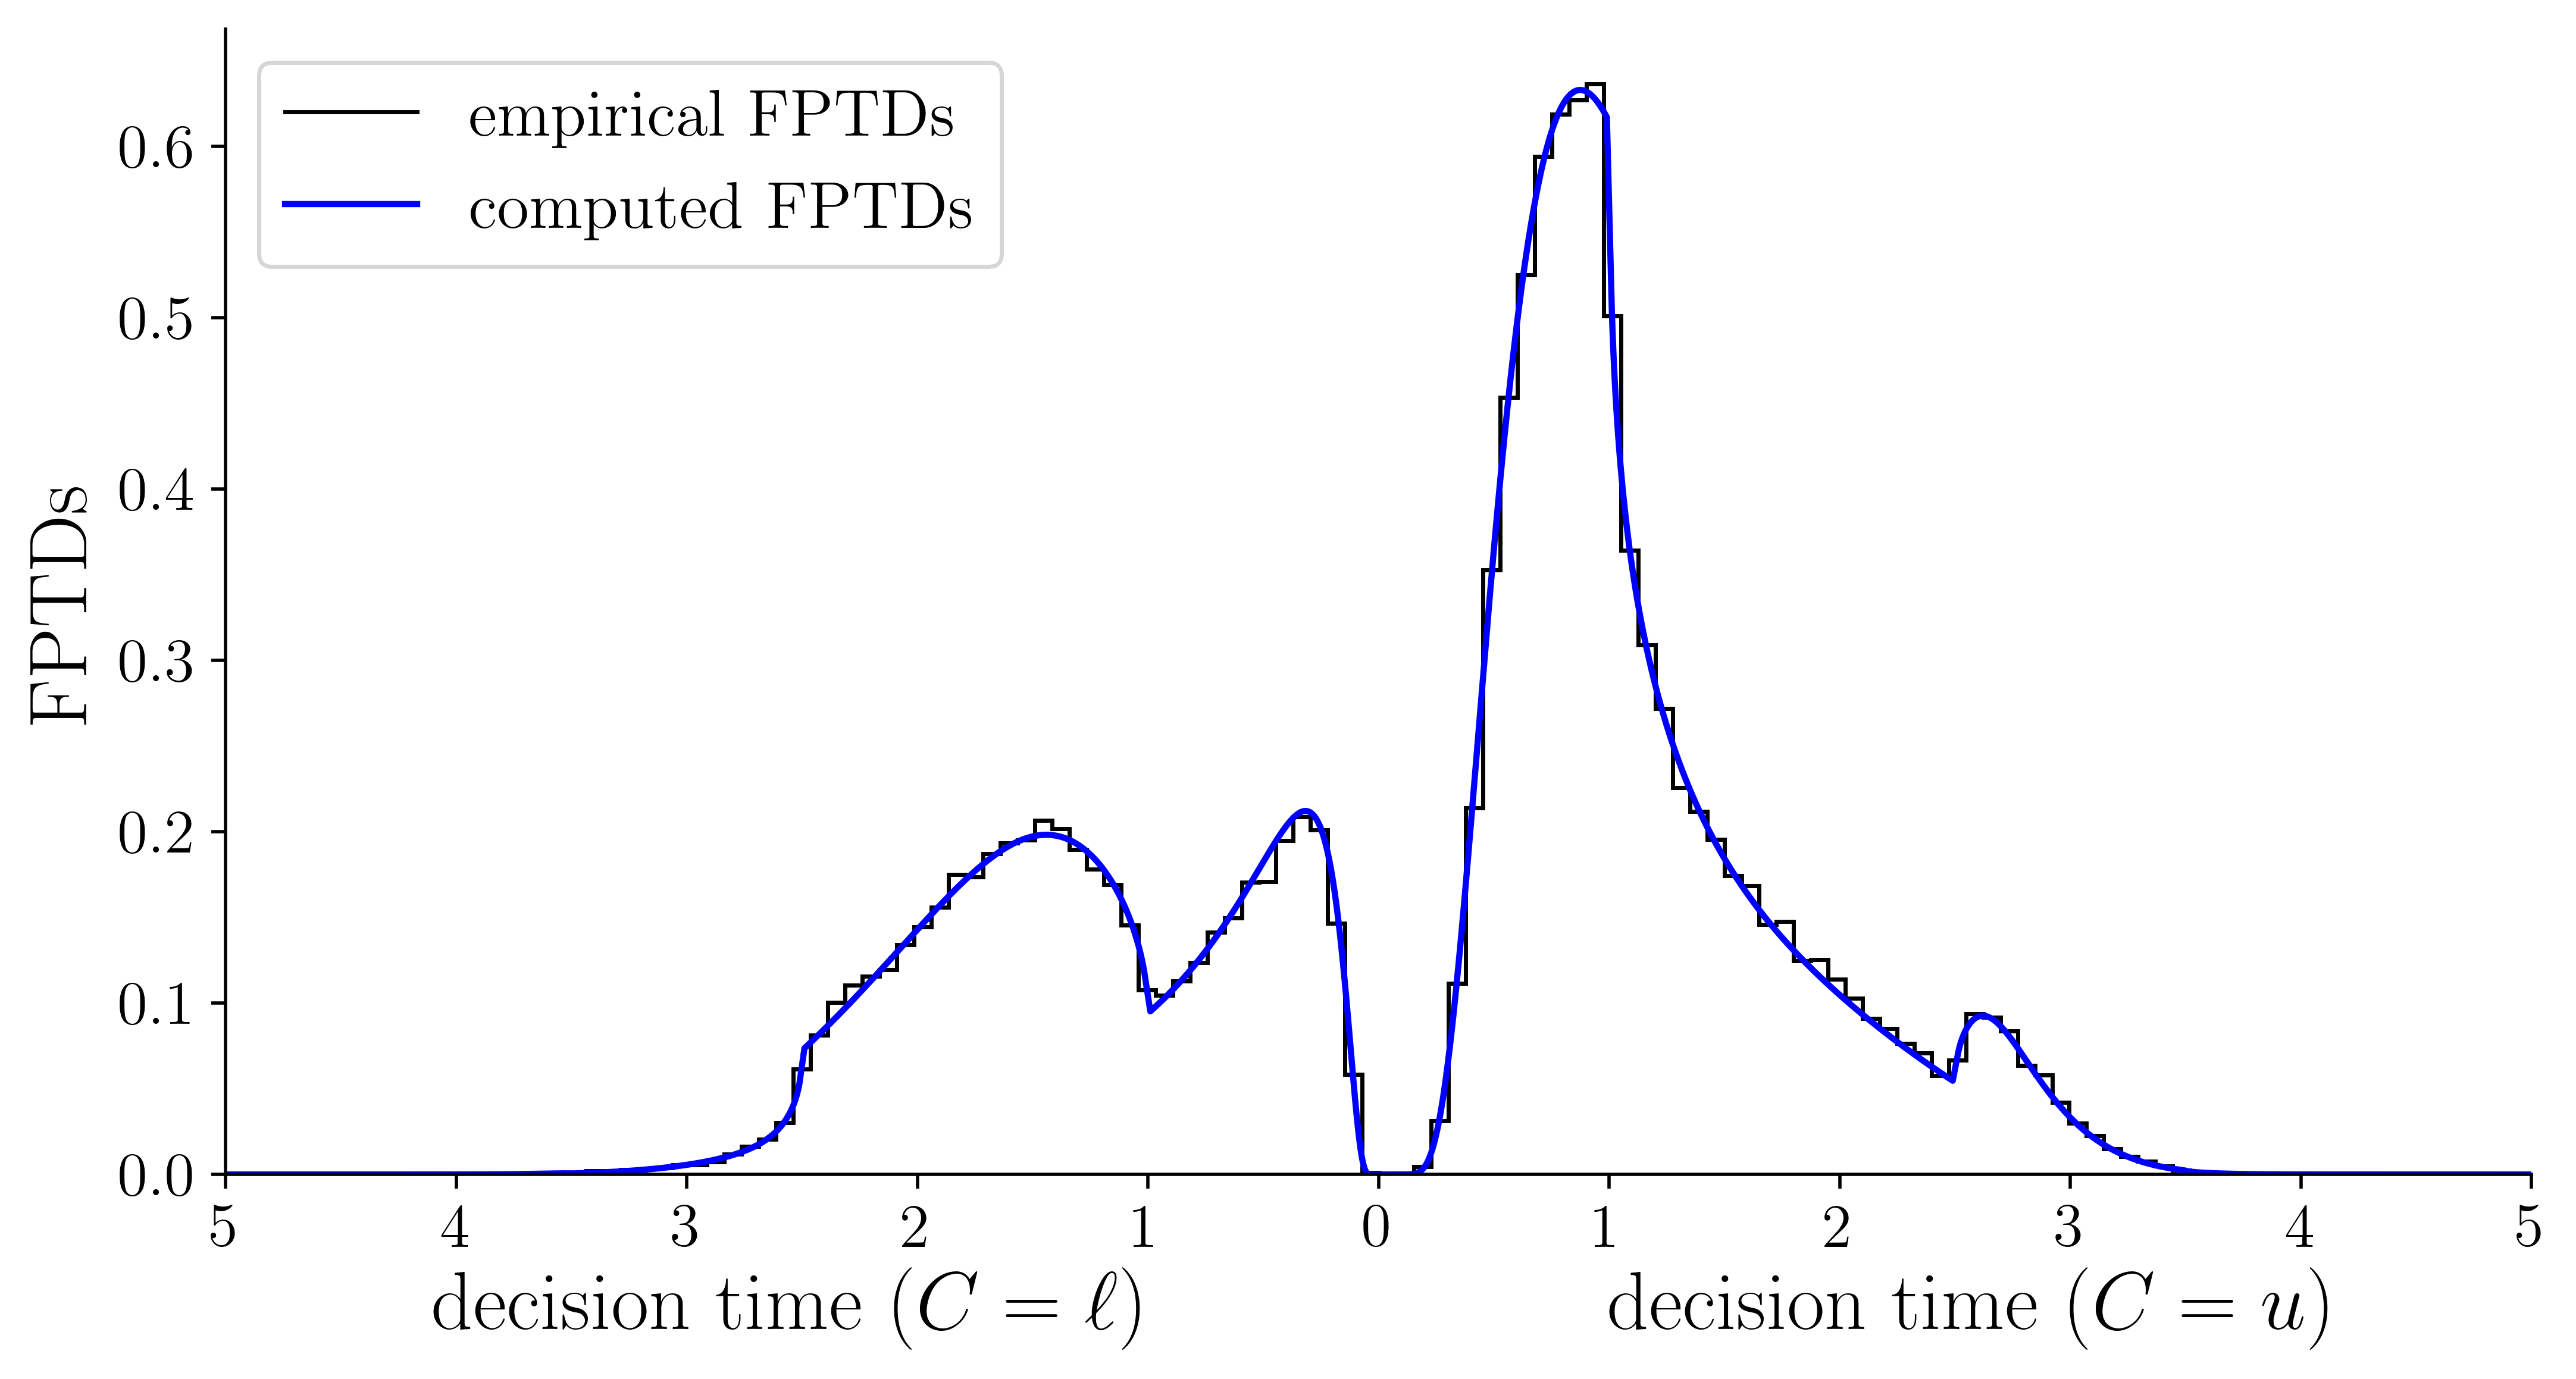

In [8]:
# make plot for the paper

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
ax.stairs(counts_t / num_fpt / dt_bin, bins_t, color="black", label="empirical FPTDs")
ax.plot(ts, upper_fptds, c='b', label="computed FPTDs")
ax.plot(-ts, lower_fptds, c='b')
ax.legend(fontsize=16, loc="upper left")

ax.text(-4.1, -0.09, r"decision time ($C=\ell$)", fontsize=20)
ax.text(1., -0.09, r"decision time ($C=u$)", fontsize=20)
ax.set_ylabel("FPTDs", fontsize=20)

ax.autoscale(tight=True, axis="x")

ax.set_xticks(np.arange(-5, 6, 1))
ax.set_xticklabels(np.hstack([np.arange(5, 0, -1), np.arange(0, 6, 1)]), fontsize=15)
yticks = np.arange(0, 0.65, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.1f}" for y in yticks], fontsize=15)
ax.spines[['right', 'top']].set_visible(False)

plt.savefig('ex1-figure.png', format='png', bbox_inches='tight', transparent=True)
plt.show()
